<a href="https://colab.research.google.com/github/abhinowo/CNNbestModel/blob/main/CNNBestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS BESAR  - B21-CAP0252

- Ainiyyah M2472349
- Amora Devi Larasati C0100996
- Aryo Anindyo Abhinowo M2001980	
- Muhammad Abdullah Rasyad A0121261
- Rizal Yusuf Audri C0121209
- Taufik Fadlurahman Fajari A0121265


## Top-Down Approach 

Convolutional Neural Network (CNN) adalah salah satu jenis neural network yang biasa digunakan pada data image. CNN bisa digunakan untuk mendeteksi dan mengenali object pada sebuah image. Secara garis besarnya, CNN memanfaatkan proses konvolusi dengan menggerakan sebuah kernel konvolusi (filter) berukuran tertentu ke sebuah gambar, komputer mendapatkan informasi representatif baru dari hasil perkalian bagian gambar tersebut dengan filter yang digunakan.

## Project Objectives

Kasus ini merupakan pengolahan pengenalan pola dari berbagai macam tempat yang ada sehingga nanti nya bisa diklasifikasikan secara supervised learning. Dataset yang kami ambil berasal dari pyimage search dengan judul  [Natural Disaster Image Dataset](https://drive.google.com/u/0/uc?id=1NvTyhUsrFbL91E10EPm38IjoCg6E2c6q&export=download) 

Project ini berfokus kepada
- Exploratory Data
- Reshapping & Labeling
- Membuat Prediksi 
- Saving model
- Deploying 


## 1. Import Library and Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
root_path = 'drive/MyDrive/NDD/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install -q tflite-model-maker

In [ ]:
#!apt-get install tree

In [2]:
# import libraries 
import tensorflow as tf 
assert tf.__version__.startswith('2')

import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from google.colab import files
from keras.preprocessing import image

# from tflite_model_maker import model_spec
# from tflite_model_maker import image_classifier
# from tflite_model_maker.config import ExportFormat
# from tflite_model_maker.config import QuantizationConfig
# from tflite_model_maker.image_classifier import DataLoader

# utilities library
import cv2
import os

import random 
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

1  **About this Data**: 

We will use the Natural Disaster Dataset. The data will be normalized so its value will ranging from 0 to 1. 

The label will be denoted as numbers, which follow this mapping : 

|    | Expression   |
|---:|:-------------|
|  0 | CYCLONE          |
|  1 | FLOOD          |
|  2 |  EARTHQUAKE        |
|  3 |  WILDFIRE   |
             


In [ ]:
#!wget 'https://drive.google.com/u/0/uc?id=1NvTyhUsrFbL91E10EPm38IjoCg6E2c6q&export=download'
#!unzip -q (namafile).zip 

In [3]:
#@title Code for loading the data
data_path = 'drive/MyDrive/NDD/'
data_dir_list = os.listdir(data_path)

img_data_list=[]
img_label = []
label_map = {}
i = 0 

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    label_map[i] = str(dataset)
    
    # print ('Load the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        img_label.append(i)
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(224,224))
        img_data_list.append(input_img_resize)
    i += 1

img_data = np.array(img_data_list)
img_data = img_data.astype('float')
img_data = img_data/255 #normalization
img_label = np.array(img_label)

def getlabel(id):
    return label_map[id]

In [5]:
label_map

{0: 'Cyclone', 1: 'Flood', 2: 'Earthquake', 3: 'Wildfire'}

In [6]:
img_data.shape

(4428, 224, 224, 3)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_data, img_label, test_size=0.2, random_state=0)

In [8]:
x_train.shape

(3542, 224, 224, 3)

In [9]:
x_test.shape

(886, 224, 224, 3)

In [10]:
x_train[0]

array([[[0.87843137, 0.9372549 , 0.94901961],
        [0.86666667, 0.92941176, 0.96862745],
        [0.86666667, 0.94509804, 0.96470588],
        ...,
        [0.87058824, 0.92156863, 0.97647059],
        [0.85098039, 0.92941176, 0.95686275],
        [0.87058824, 0.92941176, 0.96078431]],

       [[0.87843137, 0.9372549 , 0.98431373],
        [0.86666667, 0.9254902 , 0.98823529],
        [0.87058824, 0.94901961, 0.97254902],
        ...,
        [0.85882353, 0.92941176, 0.97254902],
        [0.83921569, 0.92941176, 0.96078431],
        [0.89803922, 0.93333333, 0.98431373]],

       [[0.8745098 , 0.94117647, 0.98823529],
        [0.87058824, 0.92941176, 0.98039216],
        [0.8745098 , 0.94901961, 0.94901961],
        ...,
        [0.92941176, 0.9372549 , 0.92941176],
        [0.8745098 , 0.94509804, 0.97254902],
        [0.88627451, 0.9254902 , 0.98039216]],

       ...,

       [[0.8627451 , 0.93333333, 0.97254902],
        [0.87058824, 0.93333333, 0.96470588],
        [0.87843137, 0

2

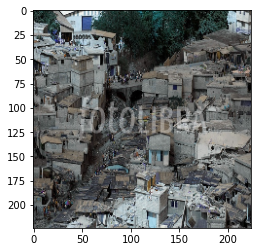

In [11]:
plt.imshow(x_train[12])
y_train[12]

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(img_label[labels[i]])
    plt.show()

In [ ]:
display_examples(x_train,img_data , img_label)

## 2. Create the Model

### Model awal

In [ ]:
# aug = ImageDataGenerator(
# 	rotation_range=30,
# 	zoom_range=0.15,
# 	width_shift_range=0.2,
# 	height_shift_range=0.2,
# 	shear_range=0.15,
# 	horizontal_flip=True,
# 	fill_mode="nearest")

In [ ]:
# simple model in 1st Notebook

# model_simple = keras.Sequential()
# model_simple.add(keras.layers.Dense(units=1, input_shape=[1]))

# model_simple.compile(optimizer='SGD', loss='mean_squared_error')

In [ ]:
# Neural Network in 2nd Notebook

# model_nn = keras.Sequential()

# model_nn.add(keras.layers.Flatten(input_shape=(128,128,3)) ) # flatten layer 
# model_nn.add(keras.layers.Dense(units = 128,activation='relu') )  #input layer 
# model_nn.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
# model_nn.add(keras.layers.Dense(units = 6, activation='softmax') ) # output layer 

# model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model_cnn = keras.Sequential()

model_cnn.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), input_shape=(224,224,3), padding='same', activation="relu"))
model_cnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn.add(keras.layers.MaxPooling2D())
#model_cnn.add(keras.layers.Dropout(0.5))

model_cnn.add(keras.layers.Flatten()) # flatten layer 
#model_cnn.add(keras.layers.Dense(units = 512,activation='relu') ) #input layer
model_cnn.add(keras.layers.Dense(units = 128,activation='relu') )   
model_cnn.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# summarize the model to see what happened inside
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 401408)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               51380352  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2

In [14]:
history = model_cnn.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 20s 41ms/step - loss: 2.0867 - accuracy: 0.6335 - val_loss: 0.6927 - val_accuracy: 0.7551
Epoch 2/15
111/111 [==============================] - 4s 36ms/step - loss: 0.4704 - accuracy: 0.8385 - val_loss: 0.5270 - val_accuracy: 0.8070
Epoch 3/15
111/111 [==============================] - 4s 36ms/step - loss: 0.2425 - accuracy: 0.9173 - val_loss: 0.6987 - val_accuracy: 0.7867
Epoch 4/15
111/111 [==============================] - 4s 36ms/step - loss: 0.1211 - accuracy: 0.9667 - val_loss: 0.6691 - val_accuracy: 0.7765
Epoch 5/15
111/111 [==============================] - 4s 35ms/step - loss: 0.0632 - accuracy: 0.9814 - val_loss: 0.6327 - val_accuracy: 0.8070
Epoch 6/15
111/111 [==============================] - 4s 36ms/step - loss: 0.0361 - accuracy: 0.9901 - val_loss: 0.7436 - val_accuracy: 0.7935
Epoch 7/15
111/111 [==============================] - 4s 36ms/step - loss: 0.0140 - accuracy: 0.9969 - val_loss: 0.6863 - val_accuracy: 0.823

In [15]:
score_accuracy = model_cnn.evaluate(x_test, y_test)

28/28 [==============================] - 0s 13ms/step - loss: 0.8986 - accuracy: 0.8341


In [11]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

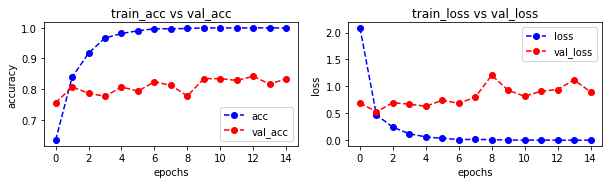

In [17]:
plot_accuracy_loss(history)

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 80% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.

-- this new model surely overfit. doesnt have any improvement by looking at the graph



In [18]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
# validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

# batch_size = 100
# target_size = (128,128)
# image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
# train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
#                                                directory=x_train,
#                                                shuffle=True,
#                                                target_size=target_size)
# val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
#                                                               directory=y_test,
#                                                               target_size=target_size,
#                                                               class_mode='categorical')

### Model 1



---



In [19]:
model_cnn1 = keras.Sequential()

model_cnn1.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), input_shape=(224,224,3), padding='same', activation="relu"))
model_cnn1.add(keras.layers.MaxPooling2D())
model_cnn1.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn1.add(keras.layers.MaxPooling2D())


model_cnn1.add(keras.layers.Flatten()) # flatten layer 
model_cnn1.add(keras.layers.Dense(units = 128,activation='relu') )   
model_cnn1.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn1.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model_cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               12845184  
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [21]:
history_2 = model_cnn1.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 3s 24ms/step - loss: 1.0349 - accuracy: 0.5895 - val_loss: 0.6526 - val_accuracy: 0.7889
Epoch 2/15
111/111 [==============================] - 2s 21ms/step - loss: 0.4777 - accuracy: 0.8281 - val_loss: 0.4940 - val_accuracy: 0.8262
Epoch 3/15
111/111 [==============================] - 2s 21ms/step - loss: 0.2479 - accuracy: 0.9224 - val_loss: 0.5693 - val_accuracy: 0.7935
Epoch 4/15
111/111 [==============================] - 2s 21ms/step - loss: 0.1249 - accuracy: 0.9613 - val_loss: 0.5166 - val_accuracy: 0.8409
Epoch 5/15
111/111 [==============================] - 2s 21ms/step - loss: 0.0673 - accuracy: 0.9819 - val_loss: 0.5997 - val_accuracy: 0.8160
Epoch 6/15
111/111 [==============================] - 2s 21ms/step - loss: 0.0348 - accuracy: 0.9898 - val_loss: 0.6398 - val_accuracy: 0.8273
Epoch 7/15
111/111 [==============================] - 2s 21ms/step - loss: 0.0283 - accuracy: 0.9924 - val_loss: 0.7536 - val_accuracy: 0.7923

In [22]:
score_accuracy = model_cnn1.evaluate(x_test, y_test)

28/28 [==============================] - 0s 10ms/step - loss: 0.7967 - accuracy: 0.8510


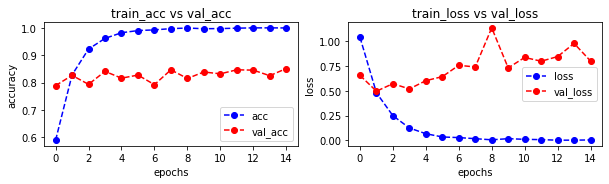

In [23]:
plot_accuracy_loss(history_2)

### Model 2


In [24]:
model_cnn2 = keras.Sequential()

model_cnn2.add(keras.layers.Conv2D(filters=16, kernel_size=(7,7), input_shape=(224,224,3), padding='same', activation="relu"))
model_cnn2.add(keras.layers.MaxPooling2D())
model_cnn2.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu"))
model_cnn2.add(keras.layers.MaxPooling2D())
model_cnn2.add(keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn2.add(keras.layers.MaxPooling2D())


model_cnn2.add(keras.layers.Flatten()) # flatten layer 
model_cnn2.add(keras.layers.Dense(units = 128,activation='relu') )   #input layer
model_cnn2.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn2.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model_cnn2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 16)      2368      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [26]:
history_3 = model_cnn2.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 4s 26ms/step - loss: 0.9229 - accuracy: 0.6124 - val_loss: 0.6620 - val_accuracy: 0.7664
Epoch 2/15
111/111 [==============================] - 2s 22ms/step - loss: 0.5939 - accuracy: 0.7756 - val_loss: 0.5953 - val_accuracy: 0.7686
Epoch 3/15
111/111 [==============================] - 2s 22ms/step - loss: 0.5190 - accuracy: 0.8077 - val_loss: 0.4980 - val_accuracy: 0.8126
Epoch 4/15
111/111 [==============================] - 2s 22ms/step - loss: 0.4208 - accuracy: 0.8512 - val_loss: 0.6467 - val_accuracy: 0.7765
Epoch 5/15
111/111 [==============================] - 2s 22ms/step - loss: 0.3475 - accuracy: 0.8758 - val_loss: 0.4956 - val_accuracy: 0.8205
Epoch 6/15
111/111 [==============================] - 2s 22ms/step - loss: 0.2146 - accuracy: 0.9294 - val_loss: 0.5287 - val_accuracy: 0.8115
Epoch 7/15
111/111 [==============================] - 2s 22ms/step - loss: 0.1509 - accuracy: 0.9500 - val_loss: 0.5411 - val_accuracy: 0.8307

In [27]:
score_accuracy = model_cnn2.evaluate(x_test, y_test)

28/28 [==============================] - 0s 11ms/step - loss: 1.0016 - accuracy: 0.8273


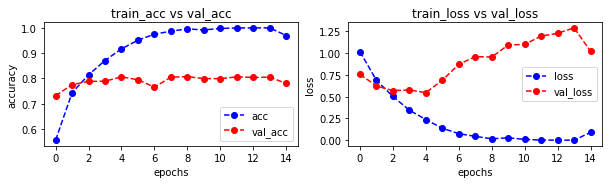

In [28]:
plot_accuracy_loss(history_3)

### Model 3

In [28]:
model_cnn3 = keras.Sequential()

model_cnn3.add(keras.layers.Conv2D(filters=32, kernel_size=(7,7), input_shape=(224,224,3), padding='same', activation="relu"))
model_cnn3.add(keras.layers.MaxPooling2D())
model_cnn3.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation="relu"))
model_cnn3.add(keras.layers.MaxPooling2D())
model_cnn3.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn3.add(keras.layers.MaxPooling2D())


model_cnn3.add(keras.layers.Flatten()) # flatten layer 
model_cnn3.add(keras.layers.Dense(units = 128,activation='relu') )  #input layer 
model_cnn3.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn3.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model_cnn3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 32)      4736      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 32)      25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)            

In [30]:
history_4 = model_cnn3.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 5s 39ms/step - loss: 1.0410 - accuracy: 0.5390 - val_loss: 0.6899 - val_accuracy: 0.7460
Epoch 2/15
111/111 [==============================] - 3s 31ms/step - loss: 0.6281 - accuracy: 0.7676 - val_loss: 0.5768 - val_accuracy: 0.8014
Epoch 3/15
111/111 [==============================] - 3s 31ms/step - loss: 0.5369 - accuracy: 0.8021 - val_loss: 0.5183 - val_accuracy: 0.8047
Epoch 4/15
111/111 [==============================] - 3s 31ms/step - loss: 0.3951 - accuracy: 0.8492 - val_loss: 0.5410 - val_accuracy: 0.8307
Epoch 5/15
111/111 [==============================] - 3s 31ms/step - loss: 0.3496 - accuracy: 0.8749 - val_loss: 0.4916 - val_accuracy: 0.8307
Epoch 6/15
111/111 [==============================] - 3s 31ms/step - loss: 0.2355 - accuracy: 0.9187 - val_loss: 0.4865 - val_accuracy: 0.8352
Epoch 7/15
111/111 [==============================] - 3s 31ms/step - loss: 0.1906 - accuracy: 0.9365 - val_loss: 0.6763 - val_accuracy: 0.8025

In [31]:
score_accuracy = model_cnn3.evaluate(x_test, y_test)

28/28 [==============================] - 0s 14ms/step - loss: 0.9800 - accuracy: 0.8284


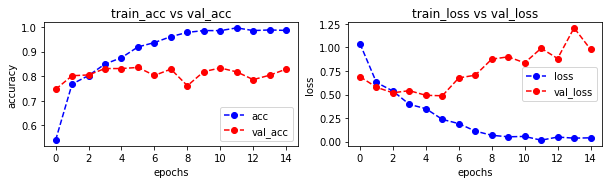

In [32]:
plot_accuracy_loss(history_4)

### Model 4

In [33]:
model_cnn4 = keras.Sequential()

model_cnn4.add(keras.layers.Conv2D(filters=16, kernel_size=(7,7), input_shape=(224,224,3), padding='same', activation="relu"))
model_cnn4.add(keras.layers.MaxPooling2D())
model_cnn4.add(keras.layers.Conv2D(filters=16, kernel_size=(7,7), padding='same', activation="relu"))
model_cnn4.add(keras.layers.MaxPooling2D())
model_cnn4.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation="relu"))
model_cnn4.add(keras.layers.MaxPooling2D())
model_cnn4.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation="relu"))
model_cnn4.add(keras.layers.MaxPooling2D())

model_cnn4.add(keras.layers.Flatten()) # flatten layer 
model_cnn4.add(keras.layers.Dense(units = 128,activation='relu') ) #input layer  
model_cnn4.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn4.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
model_cnn4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 16)      2368      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 16)      12560     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 32)        12832     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)       

In [35]:
history_5 = model_cnn4.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 4s 31ms/step - loss: 1.0606 - accuracy: 0.5215 - val_loss: 0.7037 - val_accuracy: 0.7517
Epoch 2/15
111/111 [==============================] - 3s 24ms/step - loss: 0.6916 - accuracy: 0.7482 - val_loss: 0.5897 - val_accuracy: 0.7901
Epoch 3/15
111/111 [==============================] - 3s 24ms/step - loss: 0.5915 - accuracy: 0.7747 - val_loss: 0.5633 - val_accuracy: 0.7833
Epoch 4/15
111/111 [==============================] - 3s 24ms/step - loss: 0.4889 - accuracy: 0.8199 - val_loss: 0.5111 - val_accuracy: 0.8160
Epoch 5/15
111/111 [==============================] - 3s 24ms/step - loss: 0.4520 - accuracy: 0.8317 - val_loss: 0.5061 - val_accuracy: 0.8070
Epoch 6/15
111/111 [==============================] - 3s 24ms/step - loss: 0.3897 - accuracy: 0.8566 - val_loss: 0.4884 - val_accuracy: 0.8273
Epoch 7/15
111/111 [==============================] - 3s 24ms/step - loss: 0.3196 - accuracy: 0.8840 - val_loss: 0.4879 - val_accuracy: 0.8228

In [36]:
score_accuracy = model_cnn4.evaluate(x_test, y_test)

28/28 [==============================] - 0s 12ms/step - loss: 0.9300 - accuracy: 0.8183


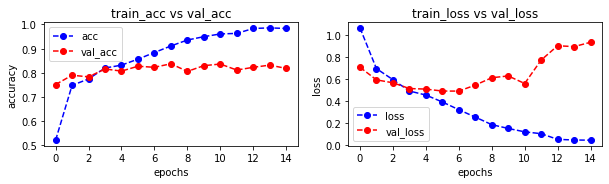

In [37]:
plot_accuracy_loss(history_5)

### Model 5

In [38]:
model_cnn5 = keras.Sequential()

model_cnn5.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), input_shape=(224,224,3), padding='same', activation="relu"))
model_cnn5.add(keras.layers.MaxPooling2D())
model_cnn5.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu"))
model_cnn5.add(keras.layers.MaxPooling2D())
model_cnn5.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn5.add(keras.layers.MaxPooling2D())
model_cnn5.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn5.add(keras.layers.MaxPooling2D())

model_cnn5.add(keras.layers.Flatten()) # flatten layer 
model_cnn5.add(keras.layers.Dense(units = 128,activation='relu') ) #input layer  
model_cnn5.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn5.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
model_cnn5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)       

In [40]:
history_6 = model_cnn5.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 3s 27ms/step - loss: 1.0158 - accuracy: 0.5635 - val_loss: 0.6801 - val_accuracy: 0.7449
Epoch 2/15
111/111 [==============================] - 2s 21ms/step - loss: 0.6388 - accuracy: 0.7688 - val_loss: 0.6375 - val_accuracy: 0.7348
Epoch 3/15
111/111 [==============================] - 2s 21ms/step - loss: 0.5490 - accuracy: 0.7956 - val_loss: 0.5334 - val_accuracy: 0.8025
Epoch 4/15
111/111 [==============================] - 2s 21ms/step - loss: 0.4583 - accuracy: 0.8289 - val_loss: 0.5238 - val_accuracy: 0.8273
Epoch 5/15
111/111 [==============================] - 2s 21ms/step - loss: 0.4215 - accuracy: 0.8425 - val_loss: 0.4360 - val_accuracy: 0.8409
Epoch 6/15
111/111 [==============================] - 2s 21ms/step - loss: 0.3322 - accuracy: 0.8786 - val_loss: 0.4044 - val_accuracy: 0.8465
Epoch 7/15
111/111 [==============================] - 2s 21ms/step - loss: 0.2473 - accuracy: 0.9150 - val_loss: 0.4455 - val_accuracy: 0.8386

In [41]:
score_accuracy = model_cnn5.evaluate(x_test, y_test)

28/28 [==============================] - 0s 11ms/step - loss: 0.6147 - accuracy: 0.8521


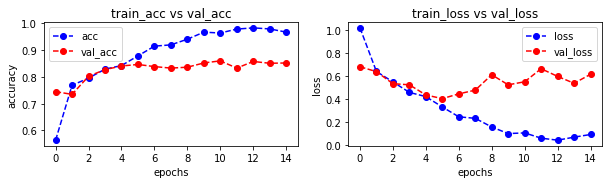

In [42]:
plot_accuracy_loss(history_6)

### Model 6

In [43]:
model_cnn6 = keras.Sequential()

model_cnn6.add(keras.layers.Conv2D(filters=16, kernel_size=(7,7), input_shape=(224,224,3), padding='same', activation="relu"))
model_cnn6.add(keras.layers.MaxPooling2D())
model_cnn6.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu"))
model_cnn6.add(keras.layers.MaxPooling2D())
model_cnn6.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn6.add(keras.layers.MaxPooling2D())
model_cnn6.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn6.add(keras.layers.MaxPooling2D())

model_cnn6.add(keras.layers.Flatten()) # flatten layer 
model_cnn6.add(keras.layers.Dense(units = 128,activation='relu') )   
model_cnn6.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn6.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
model_cnn6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 224, 224, 16)      2368      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)       

In [45]:
history_7 = model_cnn6.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 4s 27ms/step - loss: 1.0809 - accuracy: 0.5285 - val_loss: 0.7914 - val_accuracy: 0.7088
Epoch 2/15
111/111 [==============================] - 3s 23ms/step - loss: 0.7121 - accuracy: 0.7357 - val_loss: 0.6338 - val_accuracy: 0.7720
Epoch 3/15
111/111 [==============================] - 3s 23ms/step - loss: 0.6279 - accuracy: 0.7645 - val_loss: 0.5936 - val_accuracy: 0.7856
Epoch 4/15
111/111 [==============================] - 3s 23ms/step - loss: 0.5124 - accuracy: 0.8091 - val_loss: 0.5592 - val_accuracy: 0.8126
Epoch 5/15
111/111 [==============================] - 3s 23ms/step - loss: 0.4669 - accuracy: 0.8213 - val_loss: 0.5277 - val_accuracy: 0.8070
Epoch 6/15
111/111 [==============================] - 3s 23ms/step - loss: 0.3706 - accuracy: 0.8673 - val_loss: 0.5241 - val_accuracy: 0.8217
Epoch 7/15
111/111 [==============================] - 3s 23ms/step - loss: 0.2801 - accuracy: 0.8967 - val_loss: 0.6593 - val_accuracy: 0.7856

In [46]:
score_accuracy = model_cnn6.evaluate(x_test, y_test)

28/28 [==============================] - 0s 12ms/step - loss: 1.3121 - accuracy: 0.8194


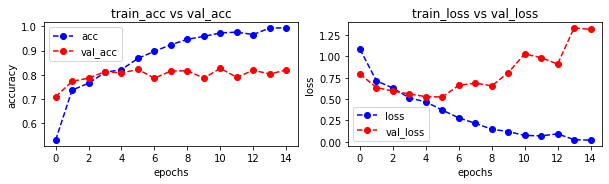

In [47]:
plot_accuracy_loss(history_7)

### Model 7 +dropout 0.5

In [48]:
model_cnn7 = keras.Sequential()

model_cnn7.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), input_shape=(224,224,3), padding='same', activation="relu"))
model_cnn7.add(keras.layers.MaxPooling2D())
model_cnn7.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu"))
model_cnn7.add(keras.layers.MaxPooling2D())
model_cnn7.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn7.add(keras.layers.MaxPooling2D())
model_cnn7.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn7.add(keras.layers.MaxPooling2D())

#Dropout
model_cnn7.add(keras.layers.Dropout(0.5))


model_cnn7.add(keras.layers.Flatten()) # flatten layer 
#model_cnn.add(keras.layers.Dense(units = 512,activation='relu') ) #input layer
model_cnn7.add(keras.layers.Dense(units = 128,activation='relu') )   
model_cnn7.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn7.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
model_cnn7.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 32)       

In [50]:
history_8 = model_cnn7.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 3s 25ms/step - loss: 0.9666 - accuracy: 0.5966 - val_loss: 0.6968 - val_accuracy: 0.7619
Epoch 2/15
111/111 [==============================] - 2s 23ms/step - loss: 0.6009 - accuracy: 0.7840 - val_loss: 0.6354 - val_accuracy: 0.7709
Epoch 3/15
111/111 [==============================] - 3s 23ms/step - loss: 0.5626 - accuracy: 0.7866 - val_loss: 0.4982 - val_accuracy: 0.8386
Epoch 4/15
111/111 [==============================] - 2s 22ms/step - loss: 0.4520 - accuracy: 0.8405 - val_loss: 0.5331 - val_accuracy: 0.8239
Epoch 5/15
111/111 [==============================] - 3s 23ms/step - loss: 0.4118 - accuracy: 0.8515 - val_loss: 0.5030 - val_accuracy: 0.8228
Epoch 6/15
111/111 [==============================] - 3s 23ms/step - loss: 0.3627 - accuracy: 0.8744 - val_loss: 0.3998 - val_accuracy: 0.8713
Epoch 7/15
111/111 [==============================] - 3s 23ms/step - loss: 0.2953 - accuracy: 0.8947 - val_loss: 0.4123 - val_accuracy: 0.8657

In [52]:
score_accuracy = model_cnn7.evaluate(x_test, y_test)

28/28 [==============================] - 0s 11ms/step - loss: 0.5002 - accuracy: 0.8702


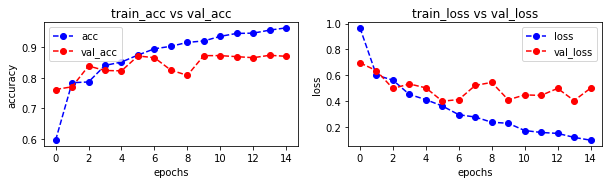

In [53]:
plot_accuracy_loss(history_8)

### Model 8 + dropout 0.6


In [54]:
model_cnn8 = keras.Sequential()

model_cnn8.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), input_shape=(224,224,3), padding='same', activation="relu"))
model_cnn8.add(keras.layers.MaxPooling2D())
model_cnn8.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu"))
model_cnn8.add(keras.layers.MaxPooling2D())
model_cnn8.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn8.add(keras.layers.MaxPooling2D())
model_cnn8.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn8.add(keras.layers.MaxPooling2D())

#Dropout
model_cnn8.add(keras.layers.Dropout(0.6))

model_cnn8.add(keras.layers.Flatten()) # flatten layer 
model_cnn8.add(keras.layers.Dense(units = 128,activation='relu') )   #input layer
model_cnn8.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn8.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
model_cnn8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 32)       

In [56]:
history_9 = model_cnn8.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 3s 25ms/step - loss: 0.9774 - accuracy: 0.5895 - val_loss: 0.6118 - val_accuracy: 0.7743
Epoch 2/15
111/111 [==============================] - 3s 27ms/step - loss: 0.6279 - accuracy: 0.7631 - val_loss: 0.5656 - val_accuracy: 0.7889
Epoch 3/15
111/111 [==============================] - 3s 26ms/step - loss: 0.5648 - accuracy: 0.7854 - val_loss: 0.5879 - val_accuracy: 0.7878
Epoch 4/15
111/111 [==============================] - 3s 26ms/step - loss: 0.5056 - accuracy: 0.8075 - val_loss: 0.5389 - val_accuracy: 0.8081
Epoch 5/15
111/111 [==============================] - 3s 26ms/step - loss: 0.4802 - accuracy: 0.8159 - val_loss: 0.5377 - val_accuracy: 0.8036
Epoch 6/15
111/111 [==============================] - 3s 27ms/step - loss: 0.4030 - accuracy: 0.8557 - val_loss: 0.4348 - val_accuracy: 0.8521
Epoch 7/15
111/111 [==============================] - 3s 27ms/step - loss: 0.3330 - accuracy: 0.8837 - val_loss: 0.4490 - val_accuracy: 0.8476

In [57]:
score_accuracy = model_cnn8.evaluate(x_test, y_test)

28/28 [==============================] - 0s 15ms/step - loss: 0.4934 - accuracy: 0.8544


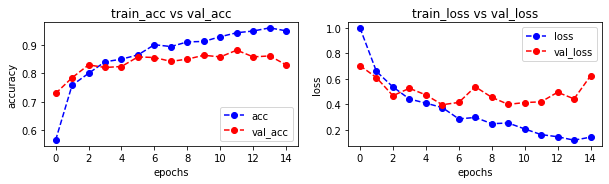

In [57]:
plot_accuracy_loss(history_9)

### Model 9 + dropout 0.7

In [58]:
model_cnn9 = keras.Sequential()

model_cnn9.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), input_shape=(224,224,3), padding='same', activation="relu"))
model_cnn9.add(keras.layers.MaxPooling2D())
model_cnn9.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu"))
model_cnn9.add(keras.layers.MaxPooling2D())
model_cnn9.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn9.add(keras.layers.MaxPooling2D())
model_cnn9.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn9.add(keras.layers.MaxPooling2D())

#Dropout
model_cnn9.add(keras.layers.Dropout(0.7))

model_cnn9.add(keras.layers.Flatten()) # flatten layer 
model_cnn9.add(keras.layers.Dense(units = 128,activation='relu') )   #input layer
model_cnn9.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn9.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn9.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
model_cnn9.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 32)       

In [60]:
history_10 = model_cnn9.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 3s 25ms/step - loss: 1.0959 - accuracy: 0.5237 - val_loss: 0.8538 - val_accuracy: 0.6840
Epoch 2/15
111/111 [==============================] - 3s 26ms/step - loss: 0.7097 - accuracy: 0.7324 - val_loss: 0.6002 - val_accuracy: 0.7822
Epoch 3/15
111/111 [==============================] - 3s 25ms/step - loss: 0.5945 - accuracy: 0.7798 - val_loss: 0.5926 - val_accuracy: 0.7867
Epoch 4/15
111/111 [==============================] - 3s 25ms/step - loss: 0.5278 - accuracy: 0.8108 - val_loss: 0.5875 - val_accuracy: 0.7720
Epoch 5/15
111/111 [==============================] - 3s 25ms/step - loss: 0.5285 - accuracy: 0.8024 - val_loss: 0.5409 - val_accuracy: 0.8183
Epoch 6/15
111/111 [==============================] - 3s 26ms/step - loss: 0.4856 - accuracy: 0.8230 - val_loss: 0.5620 - val_accuracy: 0.8047
Epoch 7/15
111/111 [==============================] - 3s 26ms/step - loss: 0.4278 - accuracy: 0.8436 - val_loss: 0.5296 - val_accuracy: 0.8149

In [61]:
score_accuracy = model_cnn9.evaluate(x_test, y_test)

28/28 [==============================] - 0s 14ms/step - loss: 0.4783 - accuracy: 0.8454


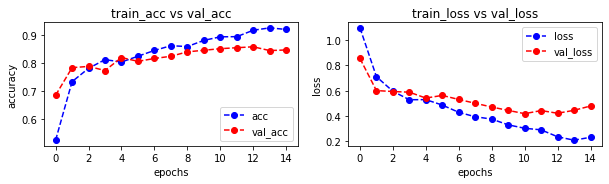

In [62]:
plot_accuracy_loss(history_10)

### Model 10 + regularisasi +d 0.5

In [4]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import regularizers

model_cnn10 = keras.Sequential()

#Regularization optimizes a model by penalizing complex models, therefore minimizing loss and complexity. 
model_cnn10.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), input_shape=(224,224,3), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn10.add(keras.layers.MaxPooling2D())
model_cnn10.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn10.add(keras.layers.MaxPooling2D())
model_cnn10.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn10.add(keras.layers.MaxPooling2D())
model_cnn10.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn10.add(keras.layers.MaxPooling2D())

#using dropout
model_cnn10.add(keras.layers.Dropout(0.5))

model_cnn10.add(keras.layers.Flatten()) # flatten layer 
model_cnn10.add(keras.layers.Dense(units = 128,activation='relu') )  #input layer 
model_cnn10.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn10.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
model_cnn10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9

In [8]:
history_11 = model_cnn10.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 18s 26ms/step - loss: 1.0769 - accuracy: 0.5855 - val_loss: 0.8188 - val_accuracy: 0.7348
Epoch 2/15
111/111 [==============================] - 2s 21ms/step - loss: 0.6980 - accuracy: 0.7744 - val_loss: 0.7491 - val_accuracy: 0.7483
Epoch 3/15
111/111 [==============================] - 2s 21ms/step - loss: 0.6391 - accuracy: 0.7942 - val_loss: 0.5778 - val_accuracy: 0.8284
Epoch 4/15
111/111 [==============================] - 2s 21ms/step - loss: 0.5712 - accuracy: 0.8250 - val_loss: 0.6067 - val_accuracy: 0.8273
Epoch 5/15
111/111 [==============================] - 2s 21ms/step - loss: 0.5078 - accuracy: 0.8433 - val_loss: 0.5152 - val_accuracy: 0.8499
Epoch 6/15
111/111 [==============================] - 2s 21ms/step - loss: 0.4364 - accuracy: 0.8696 - val_loss: 0.4957 - val_accuracy: 0.8555
Epoch 7/15
111/111 [==============================] - 2s 21ms/step - loss: 0.3754 - accuracy: 0.8890 - val_loss: 0.5464 - val_accuracy: 0.842

In [9]:
score_accuracy = model_cnn10.evaluate(x_test, y_test)

28/28 [==============================] - 0s 11ms/step - loss: 0.5199 - accuracy: 0.8646


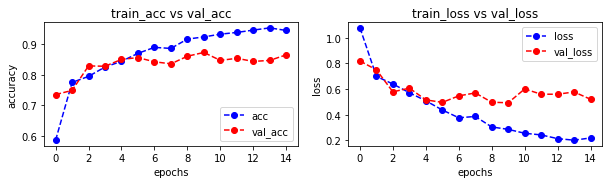

In [12]:
plot_accuracy_loss(history_11)

### Model 11 + regularisasi + d 0.7

In [13]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import regularizers

model_cnn11 = keras.Sequential()

#Regularization optimizes a model by penalizing complex models, therefore minimizing loss and complexity. 
model_cnn11.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), input_shape=(224,224,3), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn11.add(keras.layers.MaxPooling2D())
model_cnn11.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn11.add(keras.layers.MaxPooling2D())
model_cnn11.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn11.add(keras.layers.MaxPooling2D())
model_cnn11.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn11.add(keras.layers.MaxPooling2D())
#using dropout
model_cnn11.add(keras.layers.Dropout(0.7))

model_cnn11.add(keras.layers.Flatten()) # flatten layer 

#model_cnn2.add(keras.layers.Dense(units = 64, activation='relu') )
model_cnn11.add(keras.layers.Dense(units = 128,activation='relu') )  #input layer 
model_cnn11.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn11.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn11.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model_cnn11.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)       

In [15]:
history_12 = model_cnn11.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 3s 23ms/step - loss: 1.2265 - accuracy: 0.5011 - val_loss: 0.9288 - val_accuracy: 0.6885
Epoch 2/15
111/111 [==============================] - 2s 21ms/step - loss: 0.7880 - accuracy: 0.7298 - val_loss: 0.7267 - val_accuracy: 0.7596
Epoch 3/15
111/111 [==============================] - 2s 21ms/step - loss: 0.6806 - accuracy: 0.7722 - val_loss: 0.5970 - val_accuracy: 0.8160
Epoch 4/15
111/111 [==============================] - 2s 21ms/step - loss: 0.5812 - accuracy: 0.8128 - val_loss: 0.5424 - val_accuracy: 0.8318
Epoch 5/15
111/111 [==============================] - 2s 21ms/step - loss: 0.5594 - accuracy: 0.8173 - val_loss: 0.5143 - val_accuracy: 0.8318
Epoch 6/15
111/111 [==============================] - 2s 21ms/step - loss: 0.5034 - accuracy: 0.8337 - val_loss: 0.5235 - val_accuracy: 0.8397
Epoch 7/15
111/111 [==============================] - 2s 21ms/step - loss: 0.4529 - accuracy: 0.8549 - val_loss: 0.5470 - val_accuracy: 0.8296

In [16]:
score_accuracy = model_cnn11.evaluate(x_test, y_test)

28/28 [==============================] - 0s 10ms/step - loss: 0.5223 - accuracy: 0.8375


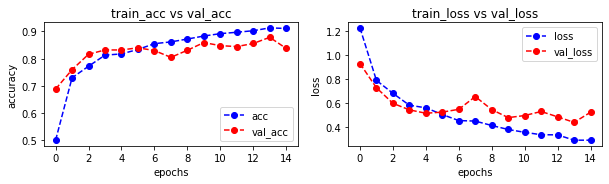

In [17]:
plot_accuracy_loss(history_12)

try make the total parameter less, so it can be save more efficient

### Model 12 + regularize + d 0.5 + 2

In [18]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import regularizers

model_cnn12 = keras.Sequential()

#Regularization optimizes a model by penalizing complex models, therefore minimizing loss and complexity. 
model_cnn12.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), input_shape=(224,224,3), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn12.add(keras.layers.MaxPooling2D())
model_cnn12.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn12.add(keras.layers.MaxPooling2D())
model_cnn12.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn12.add(keras.layers.MaxPooling2D())
model_cnn12.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn12.add(keras.layers.MaxPooling2D())
#using dropout
model_cnn12.add(keras.layers.Dropout(0.5))

model_cnn12.add(keras.layers.Flatten()) # flatten layer 

model_cnn12.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn12.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn12.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model_cnn12.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)       

In [20]:
history_13 = model_cnn12.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 3s 23ms/step - loss: 1.0913 - accuracy: 0.5985 - val_loss: 0.8353 - val_accuracy: 0.7111
Epoch 2/15
111/111 [==============================] - 2s 21ms/step - loss: 0.7534 - accuracy: 0.7696 - val_loss: 0.6581 - val_accuracy: 0.8002
Epoch 3/15
111/111 [==============================] - 2s 21ms/step - loss: 0.6441 - accuracy: 0.7984 - val_loss: 0.6177 - val_accuracy: 0.7912
Epoch 4/15
111/111 [==============================] - 2s 21ms/step - loss: 0.5776 - accuracy: 0.8230 - val_loss: 0.6395 - val_accuracy: 0.8036
Epoch 5/15
111/111 [==============================] - 2s 21ms/step - loss: 0.5445 - accuracy: 0.8363 - val_loss: 0.5430 - val_accuracy: 0.8521
Epoch 6/15
111/111 [==============================] - 2s 21ms/step - loss: 0.4757 - accuracy: 0.8532 - val_loss: 0.5015 - val_accuracy: 0.8476
Epoch 7/15
111/111 [==============================] - 2s 21ms/step - loss: 0.4127 - accuracy: 0.8828 - val_loss: 0.4685 - val_accuracy: 0.8657

In [21]:
score_accuracy = model_cnn12.evaluate(x_test, y_test)

28/28 [==============================] - 0s 10ms/step - loss: 0.5762 - accuracy: 0.8567


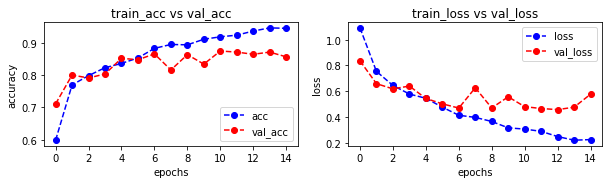

In [23]:
plot_accuracy_loss(history_13)

### Model 13 +regularize + d 0.7 + 2

In [27]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import regularizers

model_cnn13 = keras.Sequential()

#Regularization optimizes a model by penalizing complex models, therefore minimizing loss and complexity. 
model_cnn13.add(keras.layers.Conv2D(filters=16, kernel_size=(5,3), input_shape=(224,224,3), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn13.add(keras.layers.MaxPooling2D())
model_cnn13.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn13.add(keras.layers.MaxPooling2D())
model_cnn13.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn13.add(keras.layers.MaxPooling2D())
model_cnn13.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn13.add(keras.layers.MaxPooling2D())

#using dropout
model_cnn13.add(keras.layers.Dropout(0.7))

model_cnn13.add(keras.layers.Flatten()) # flatten layer 

model_cnn13.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn13.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn13.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model_cnn13.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 224, 224, 16)      736       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)       

In [30]:
history_14 = model_cnn13.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 3s 25ms/step - loss: 1.1459 - accuracy: 0.5576 - val_loss: 0.8303 - val_accuracy: 0.7348
Epoch 2/15
111/111 [==============================] - 2s 20ms/step - loss: 0.7553 - accuracy: 0.7513 - val_loss: 0.6306 - val_accuracy: 0.8059
Epoch 3/15
111/111 [==============================] - 2s 20ms/step - loss: 0.6482 - accuracy: 0.7905 - val_loss: 0.5920 - val_accuracy: 0.8160
Epoch 4/15
111/111 [==============================] - 2s 20ms/step - loss: 0.5566 - accuracy: 0.8278 - val_loss: 0.5766 - val_accuracy: 0.8273
Epoch 5/15
111/111 [==============================] - 2s 20ms/step - loss: 0.5706 - accuracy: 0.8227 - val_loss: 0.5558 - val_accuracy: 0.8217
Epoch 6/15
111/111 [==============================] - 2s 20ms/step - loss: 0.5019 - accuracy: 0.8427 - val_loss: 0.5011 - val_accuracy: 0.8488
Epoch 7/15
111/111 [==============================] - 2s 20ms/step - loss: 0.4741 - accuracy: 0.8521 - val_loss: 0.5390 - val_accuracy: 0.8352

In [31]:
score_accuracy = model_cnn13.evaluate(x_test, y_test)

28/28 [==============================] - 0s 10ms/step - loss: 0.5389 - accuracy: 0.8454


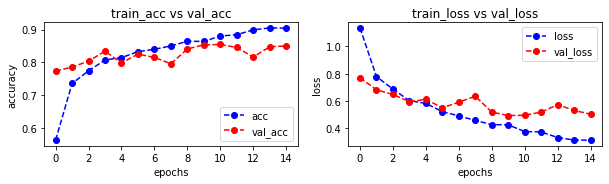

In [ ]:
plot_acc_loss(history_10)

### Model Final 1 + d 0.5 + 2

In [32]:
model_cnnFinal = keras.Sequential()

model_cnnFinal.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), input_shape=(224,224,3), padding='same', activation="relu"))
model_cnnFinal.add(keras.layers.MaxPooling2D())
model_cnnFinal.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu"))
model_cnnFinal.add(keras.layers.MaxPooling2D())
model_cnnFinal.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnnFinal.add(keras.layers.MaxPooling2D())
model_cnnFinal.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnnFinal.add(keras.layers.MaxPooling2D())

#Dropout
model_cnnFinal.add(keras.layers.Dropout(0.5))

model_cnnFinal.add(keras.layers.Flatten()) # flatten layer 
model_cnnFinal.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnnFinal.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnnFinal.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
model_cnnFinal.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 32)       

In [34]:
history_final = model_cnnFinal.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 4s 29ms/step - loss: 1.0923 - accuracy: 0.5296 - val_loss: 0.9061 - val_accuracy: 0.6580
Epoch 2/15
111/111 [==============================] - 2s 21ms/step - loss: 0.7295 - accuracy: 0.7250 - val_loss: 0.6146 - val_accuracy: 0.7743
Epoch 3/15
111/111 [==============================] - 2s 21ms/step - loss: 0.5741 - accuracy: 0.7851 - val_loss: 0.5354 - val_accuracy: 0.8002
Epoch 4/15
111/111 [==============================] - 2s 21ms/step - loss: 0.4865 - accuracy: 0.8213 - val_loss: 0.4698 - val_accuracy: 0.8318
Epoch 5/15
111/111 [==============================] - 2s 21ms/step - loss: 0.4268 - accuracy: 0.8447 - val_loss: 0.4443 - val_accuracy: 0.8499
Epoch 6/15
111/111 [==============================] - 2s 21ms/step - loss: 0.4045 - accuracy: 0.8501 - val_loss: 0.4272 - val_accuracy: 0.8476
Epoch 7/15
111/111 [==============================] - 2s 21ms/step - loss: 0.3530 - accuracy: 0.8693 - val_loss: 0.4020 - val_accuracy: 0.8646

In [36]:
score_accuracy = model_cnnFinal.evaluate(x_test, y_test)

28/28 [==============================] - 0s 10ms/step - loss: 0.4997 - accuracy: 0.8442


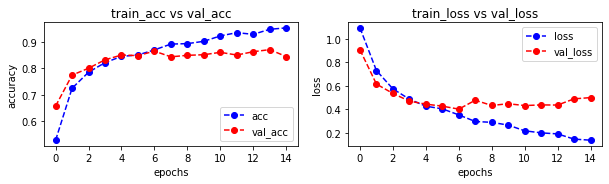

In [35]:
plot_accuracy_loss(history_final)

### Model Final Capstone + 3

In [37]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import regularizers

model = keras.Sequential()

#Regularization optimizes a model by penalizing complex models, therefore minimizing loss and complexity. 
model.add(keras.layers.Conv2D(filters=16, kernel_size=(7,7), input_shape=(224,224,3), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(filters=32, kernel_size=(2,2), padding='same', activation="relu"))
model.add(keras.layers.MaxPooling2D())

#using dropout
model.add(keras.layers.Dropout(0.7))

model.add(keras.layers.Flatten()) # flatten layer 
model.add(keras.layers.Dense(units = 64, activation='relu') )  #input layer 
model.add(keras.layers.Dense(units = 16, activation='relu') )  # hidden layer 
model.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 224, 224, 16)      2368      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 32)       

In [39]:
history_model = model.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 4s 27ms/step - loss: 1.2194 - accuracy: 0.5130 - val_loss: 1.0131 - val_accuracy: 0.6411
Epoch 2/15
111/111 [==============================] - 3s 23ms/step - loss: 0.8128 - accuracy: 0.7126 - val_loss: 0.7121 - val_accuracy: 0.7686
Epoch 3/15
111/111 [==============================] - 3s 23ms/step - loss: 0.6876 - accuracy: 0.7538 - val_loss: 0.6960 - val_accuracy: 0.7799
Epoch 4/15
111/111 [==============================] - 3s 23ms/step - loss: 0.6269 - accuracy: 0.7877 - val_loss: 0.6714 - val_accuracy: 0.7743
Epoch 5/15
111/111 [==============================] - 3s 23ms/step - loss: 0.5879 - accuracy: 0.8007 - val_loss: 0.5957 - val_accuracy: 0.8047
Epoch 6/15
111/111 [==============================] - 3s 23ms/step - loss: 0.5429 - accuracy: 0.8134 - val_loss: 0.5636 - val_accuracy: 0.8115
Epoch 7/15
111/111 [==============================] - 3s 23ms/step - loss: 0.4977 - accuracy: 0.8363 - val_loss: 0.6240 - val_accuracy: 0.7912

In [40]:
score_accuracy = model.evaluate(x_test, y_test)

28/28 [==============================] - 0s 11ms/step - loss: 0.4705 - accuracy: 0.8589


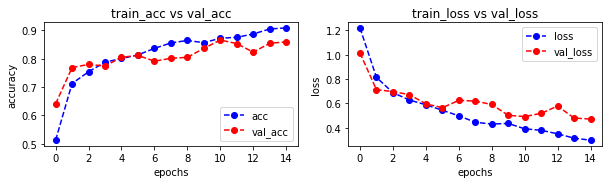

In [41]:
plot_accuracy_loss(history_model)

### Model Upgrade Capstone + d 0.5 + 3

In [42]:
modelcnn = keras.Sequential()

#Regularization optimizes a model by penalizing complex models, therefore minimizing loss and complexity. 
modelcnn.add(keras.layers.Conv2D(filters=16, kernel_size=(7,7), input_shape=(224,224,3), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
modelcnn.add(keras.layers.MaxPooling2D())
modelcnn.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
modelcnn.add(keras.layers.MaxPooling2D())
modelcnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
modelcnn.add(keras.layers.MaxPooling2D())
modelcnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
modelcnn.add(keras.layers.MaxPooling2D())

#using dropout
modelcnn.add(keras.layers.Dropout(0.5))

modelcnn.add(keras.layers.Flatten()) # flatten layer 
modelcnn.add(keras.layers.Dense(units = 64, activation='relu') )  #input layer 
modelcnn.add(keras.layers.Dense(units = 16, activation='relu') )  # hidden layer 
modelcnn.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

modelcnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
modelcnn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 224, 224, 16)      2368      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 32)       

In [44]:
history_modelcnn = modelcnn.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 3s 26ms/step - loss: 1.2171 - accuracy: 0.5065 - val_loss: 0.9138 - val_accuracy: 0.6795
Epoch 2/15
111/111 [==============================] - 3s 23ms/step - loss: 0.8566 - accuracy: 0.6897 - val_loss: 0.9377 - val_accuracy: 0.6512
Epoch 3/15
111/111 [==============================] - 3s 23ms/step - loss: 0.7150 - accuracy: 0.7504 - val_loss: 0.6620 - val_accuracy: 0.7822
Epoch 4/15
111/111 [==============================] - 3s 23ms/step - loss: 0.6089 - accuracy: 0.7976 - val_loss: 0.6520 - val_accuracy: 0.7856
Epoch 5/15
111/111 [==============================] - 3s 23ms/step - loss: 0.5544 - accuracy: 0.8182 - val_loss: 0.5587 - val_accuracy: 0.8217
Epoch 6/15
111/111 [==============================] - 3s 23ms/step - loss: 0.4567 - accuracy: 0.8546 - val_loss: 0.5418 - val_accuracy: 0.8318
Epoch 7/15
111/111 [==============================] - 3s 23ms/step - loss: 0.4403 - accuracy: 0.8501 - val_loss: 0.6424 - val_accuracy: 0.8002

In [45]:
score_accuracy = modelcnn.evaluate(x_test, y_test)

28/28 [==============================] - 0s 11ms/step - loss: 0.8587 - accuracy: 0.7709


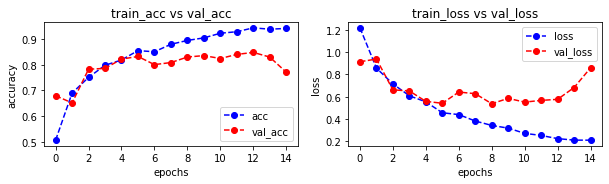

In [46]:
plot_accuracy_loss(history_modelcnn)

### MODEL 2.5.0 CNN 


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# aug = ImageDataGenerator(
# 	rotation_range=30,
# 	zoom_range=0.15,
# 	width_shift_range=0.2,
# 	height_shift_range=0.2,
# 	shear_range=0.15,
# 	horizontal_flip=True,
# 	fill_mode="nearest")

In [ ]:
# MIN_LR = 1e-6
# MAX_LR = 1e-4
# BATCH_SIZE = 32

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import regularizers

model_cnn3 = keras.Sequential()

#Regularization optimizes a model by penalizing complex models, therefore minimizing loss and complexity. 
model_cnn3.add(keras.layers.Conv2D(filters=32, kernel_size=(7,7), input_shape=(224,224,3), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn3.add(keras.layers.MaxPooling2D())
model_cnn3.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn3.add(keras.layers.MaxPooling2D())
model_cnn3.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn3.add(keras.layers.MaxPooling2D())
#using dropout
model_cnn3.add(keras.layers.Dropout(0.7))

model_cnn3.add(keras.layers.Flatten()) # flatten layer 
#model_cnn2.add(keras.layers.Dense(units = 128,activation='relu') )  #input layer 
#model_cnn2.add(keras.layers.Dense(units = 64, activation='relu') )
model_cnn3.add(keras.layers.Dense(units = 100, activation='relu') )  # hidden layer 
model_cnn3.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 32)      4736      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 32)      25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 32)       

In [ ]:
history_3 = model_cnn3.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=10);

Epoch 1/10
111/111 [==============================] - 4s 36ms/step - loss: 0.1503 - accuracy: 0.9616 - val_loss: 0.6311 - val_accuracy: 0.8341
Epoch 2/10
111/111 [==============================] - 3s 31ms/step - loss: 0.1245 - accuracy: 0.9692 - val_loss: 0.7211 - val_accuracy: 0.8420
Epoch 3/10
111/111 [==============================] - 3s 31ms/step - loss: 0.1442 - accuracy: 0.9619 - val_loss: 0.6445 - val_accuracy: 0.8431
Epoch 4/10
111/111 [==============================] - 3s 31ms/step - loss: 0.1081 - accuracy: 0.9777 - val_loss: 0.6662 - val_accuracy: 0.8521
Epoch 5/10
111/111 [==============================] - 3s 31ms/step - loss: 0.1258 - accuracy: 0.9698 - val_loss: 0.6049 - val_accuracy: 0.8465
Epoch 6/10
111/111 [==============================] - 3s 31ms/step - loss: 0.0847 - accuracy: 0.9850 - val_loss: 0.6462 - val_accuracy: 0.8544
Epoch 7/10
111/111 [==============================] - 3s 32ms/step - loss: 0.0962 - accuracy: 0.9819 - val_loss: 0.8257 - val_accuracy: 0.8386

In [ ]:
score_accuracy3 = model_cnn3.evaluate(x_test, y_test)

28/28 [==============================] - 0s 14ms/step - loss: 0.6080 - accuracy: 0.8296


### MODEL 2.5.1 CNN 

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import regularizers

model_cnn4 = keras.Sequential()

#Regularization optimizes a model by penalizing complex models, therefore minimizing loss and complexity. 
model_cnn4.add(keras.layers.Conv2D(filters=16, kernel_size=(7,7), input_shape=(224,224,3), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn4.add(keras.layers.MaxPooling2D())
model_cnn4.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn4.add(keras.layers.MaxPooling2D())
model_cnn4.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn4.add(keras.layers.MaxPooling2D())
model_cnn4.add(keras.layers.Conv2D(filters=32, kernel_size=(2,2), padding='same', activation="relu"))
#using dropout
model_cnn4.add(keras.layers.Dropout(0.9))

model_cnn4.add(keras.layers.Flatten()) # flatten layer 
#model_cnn2.add(keras.layers.Dense(units = 128,activation='relu') )  #input layer 
#model_cnn2.add(keras.layers.Dense(units = 64, activation='relu') )
model_cnn4.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model_cnn4.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_cnn4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 16)      2368      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)       

In [ ]:
history_4 = model_cnn4.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 4s 28ms/step - loss: 1.1206 - accuracy: 0.5519 - val_loss: 0.7452 - val_accuracy: 0.7551
Epoch 2/15
111/111 [==============================] - 3s 23ms/step - loss: 0.7775 - accuracy: 0.7276 - val_loss: 0.6198 - val_accuracy: 0.7968
Epoch 3/15
111/111 [==============================] - 3s 23ms/step - loss: 0.6534 - accuracy: 0.7733 - val_loss: 0.5971 - val_accuracy: 0.8002
Epoch 4/15
111/111 [==============================] - 3s 23ms/step - loss: 0.6144 - accuracy: 0.7880 - val_loss: 0.6193 - val_accuracy: 0.8036
Epoch 5/15
111/111 [==============================] - 3s 23ms/step - loss: 0.5812 - accuracy: 0.8010 - val_loss: 0.5531 - val_accuracy: 0.8183
Epoch 6/15
111/111 [==============================] - 3s 23ms/step - loss: 0.5776 - accuracy: 0.8103 - val_loss: 0.5196 - val_accuracy: 0.8397
Epoch 7/15
111/111 [==============================] - 3s 23ms/step - loss: 0.5050 - accuracy: 0.8363 - val_loss: 0.5286 - val_accuracy: 0.8284

In [ ]:
score_accuracy4 = model_cnn4.evaluate(x_test, y_test)

28/28 [==============================] - 0s 12ms/step - loss: 0.6395 - accuracy: 0.8160


### MODEL 2.5.2 CNN

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import regularizers

model_cnn5 = keras.Sequential()

#Regularization optimizes a model by penalizing complex models, therefore minimizing loss and complexity. 
model_cnn5.add(keras.layers.Conv2D(filters=16, kernel_size=(7,7), input_shape=(224,224,3), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn5.add(keras.layers.MaxPooling2D())
model_cnn5.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn5.add(keras.layers.MaxPooling2D())
model_cnn5.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn5.add(keras.layers.MaxPooling2D())
model_cnn5.add(keras.layers.Conv2D(filters=32, kernel_size=(2,2), padding='same', activation="relu"))
model_cnn5.add(keras.layers.MaxPooling2D())
#using dropout
model_cnn5.add(keras.layers.Dropout(0.7))

model_cnn5.add(keras.layers.Flatten()) # flatten layer 
#model_cnn2.add(keras.layers.Dense(units = 128,activation='relu') )  #input layer 
model_cnn5.add(keras.layers.Dense(units = 64, activation='relu') )
model_cnn5.add(keras.layers.Dense(units = 16, activation='relu') )  # hidden layer 
model_cnn5.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_cnn5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 224, 224, 16)      2368      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)       

In [ ]:
history_5 = model_cnn5.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 3s 27ms/step - loss: 1.2780 - accuracy: 0.4754 - val_loss: 0.9370 - val_accuracy: 0.6343
Epoch 2/15
111/111 [==============================] - 2s 23ms/step - loss: 0.8668 - accuracy: 0.6925 - val_loss: 0.8028 - val_accuracy: 0.7280
Epoch 3/15
111/111 [==============================] - 3s 23ms/step - loss: 0.7369 - accuracy: 0.7501 - val_loss: 0.6911 - val_accuracy: 0.7720
Epoch 4/15
111/111 [==============================] - 2s 22ms/step - loss: 0.6879 - accuracy: 0.7719 - val_loss: 0.7252 - val_accuracy: 0.7675
Epoch 5/15
111/111 [==============================] - 3s 23ms/step - loss: 0.6133 - accuracy: 0.7976 - val_loss: 0.5869 - val_accuracy: 0.8160
Epoch 6/15
111/111 [==============================] - 2s 22ms/step - loss: 0.5586 - accuracy: 0.8145 - val_loss: 0.5718 - val_accuracy: 0.8262
Epoch 7/15
111/111 [==============================] - 2s 22ms/step - loss: 0.4993 - accuracy: 0.8365 - val_loss: 0.6185 - val_accuracy: 0.8228

In [ ]:
score_accuracy5 = model_cnn5.evaluate(x_test, y_test)

28/28 [==============================] - 0s 11ms/step - loss: 0.5135 - accuracy: 0.8499


### MODEL 2.5.3 CNN

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import regularizers

model_cnn6 = keras.Sequential()

#Regularization optimizes a model by penalizing complex models, therefore minimizing loss and complexity. 
model_cnn6.add(keras.layers.Conv2D(filters=16, kernel_size=(7,7), input_shape=(224,224,3), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn6.add(keras.layers.MaxPooling2D())
model_cnn6.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn6.add(keras.layers.MaxPooling2D())
model_cnn6.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn6.add(keras.layers.MaxPooling2D())
model_cnn6.add(keras.layers.Conv2D(filters=32, kernel_size=(2,2), padding='same', activation="relu"))
model_cnn6.add(keras.layers.MaxPooling2D())
model_cnn6.add(keras.layers.Conv2D(filters=64, kernel_size=(2,2), padding='same', activation="relu"))
#using dropout
model_cnn6.add(keras.layers.Dropout(0.7))

model_cnn6.add(keras.layers.Flatten()) # flatten layer 
#model_cnn2.add(keras.layers.Dense(units = 128,activation='relu') )  #input layer 
model_cnn6.add(keras.layers.Dense(units = 32, activation='relu') )
model_cnn6.add(keras.layers.Dense(units = 10, activation='relu') )  # hidden layer 
model_cnn6.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_cnn6.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 224, 224, 16)      2368      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 28, 28, 32)      

In [ ]:
history_6 = model_cnn6.fit(x_train, y_train, validation_data=(x_test,y_test), epochs =15 )

Epoch 1/15
111/111 [==============================] - 5s 40ms/step - loss: 1.3506 - accuracy: 0.3992 - val_loss: 1.0663 - val_accuracy: 0.5395
Epoch 2/15
111/111 [==============================] - 5s 41ms/step - loss: 0.8892 - accuracy: 0.6773 - val_loss: 0.7465 - val_accuracy: 0.7573
Epoch 3/15
111/111 [==============================] - 5s 48ms/step - loss: 0.7650 - accuracy: 0.7391 - val_loss: 0.6910 - val_accuracy: 0.7585
Epoch 4/15
111/111 [==============================] - 6s 50ms/step - loss: 0.6465 - accuracy: 0.7764 - val_loss: 0.6540 - val_accuracy: 0.7912
Epoch 5/15
111/111 [==============================] - 3s 25ms/step - loss: 0.6123 - accuracy: 0.7931 - val_loss: 0.5900 - val_accuracy: 0.8104
Epoch 6/15
111/111 [==============================] - 5s 46ms/step - loss: 0.5653 - accuracy: 0.8106 - val_loss: 0.6126 - val_accuracy: 0.7833
Epoch 7/15
111/111 [==============================] - 5s 43ms/step - loss: 0.5135 - accuracy: 0.8221 - val_loss: 0.5744 - val_accuracy: 0.8059

In [ ]:
score_accuracy6 = model_cnn6.evaluate(x_test, y_test)

### MODEL 2.5.4 MobileNet V2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
# get base models
base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
)

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model
#Adding custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(100, activation="relu")(x)
predictions = layers.Dense(4,activation="softmax")(x)
model_img = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model_img.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [ ]:
model_img.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_4 = model_img.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 25s 177ms/step - loss: 0.1589 - accuracy: 0.9497 - val_loss: 20.6192 - val_accuracy: 0.3397
Epoch 2/15
111/111 [==============================] - 18s 162ms/step - loss: 0.0833 - accuracy: 0.9763 - val_loss: 16.5741 - val_accuracy: 0.2686
Epoch 3/15
111/111 [==============================] - 19s 168ms/step - loss: 0.0643 - accuracy: 0.9819 - val_loss: 26.9381 - val_accuracy: 0.2156
Epoch 4/15
111/111 [==============================] - 18s 166ms/step - loss: 0.0662 - accuracy: 0.9805 - val_loss: 39.5025 - val_accuracy: 0.2156
Epoch 5/15
111/111 [==============================] - 18s 166ms/step - loss: 0.0716 - accuracy: 0.9768 - val_loss: 9.6243 - val_accuracy: 0.4639
Epoch 6/15
111/111 [==============================] - 19s 167ms/step - loss: 0.0789 - accuracy: 0.9760 - val_loss: 8.7628 - val_accuracy: 0.4153
Epoch 7/15
111/111 [==============================] - 19s 167ms/step - loss: 0.0469 - accuracy: 0.9833 - val_loss: 12.4368 - v

In [ ]:
score_accuracy5 = model_img.evaluate(x_test, y_test)

28/28 [==============================] - 1s 30ms/step - loss: 10.9815 - accuracy: 0.3544


### MODEL 2.5 VGG

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

553476096/553467096 [==============================] - 5s 0us/step


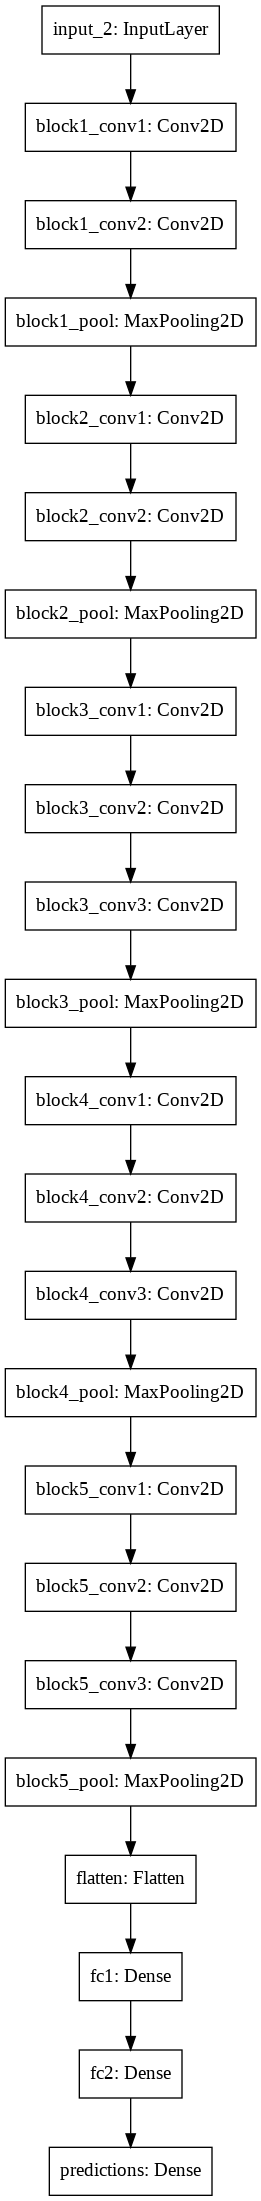

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model
model = VGG16()
plot_model(model, to_file='vgg.png')

In [ ]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('/content/drive/MyDrive/2.jpg', target_size=(224, 224))


In [ ]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [ ]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [ ]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [ ]:
# predict the probability across all output classes
yhat = model.predict(image)

In [ ]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

49152/35363 [=========================================] - 0s 0us/step
pay-phone (12.90%)


### MODEL 3  Transfer learning

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
histor_3 = model.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=10);

In [ ]:
score_accuracy3 = model.evaluate(x_test, y_test)

28/28 [==============================] - 0s 11ms/step - loss: 1.1720 - accuracy: 0.8025


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

In [ ]:
train_features = model.predict(x_train)
test_features = model.predict(y_test)

### Model 4 CNN

In [ ]:
!pip install -U efficientnet

In [ ]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation=tf.nn.relu,input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu,padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    #tf.keras.layers.Conv2D(256, (3,3), activation=tf.nn.relu,padding = 'Same'),
    #tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation = tf.nn.softmax)
])

model_4.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 222, 222, 8)       224       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 111, 111, 8)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 109, 109, 16)      1168      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 52, 52, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 26, 26, 64)      

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.000003)

In [ ]:
model_4.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])

histor_4 = model_4.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=10,verbose = 1);

# history_4 = model_4.fit(train_generator,
#                     epochs = 25,
#                     verbose = 1,
#                    validation_data = validation_generator,
#                    callbacks=[learning_rate_reduction])

### Model 5

In [ ]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(224,224,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74842112/74836368 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(3, activation='softmax')(x3)
model_dense = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
his=model.fit(datagen.flow(x_train,y_train,batch_size=32),validation_data=(x_test,y_test),epochs=10)

## 5. Predicting Image by Uploading

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path="/content/"+fn
  print(path)

img = image.load_img(path , target_size=(224,224))
x = image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images = np.vstack([x])
classes = model_cnn.predict_classes(images,batch_size=10)

print(fn)

if classes==0:
    print('cyclone')
elif classes==1:
    print('flood')
elif classes==2:
    print('earthquake')
else:
    print('wildfire')

Saving 2.jpg to 2.jpg
/content/2.jpg
2.jpg
earthquake


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## 6. Save File

In [ ]:
import time
t = time.time()

export_path_sm = "./{}".format(int(t))
print(export_path_sm)

tf.saved_model.save(model_cnn5, export_path_sm)

./1622618495

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: ./1622618495/assets


In [ ]:
# import joblib
# filename = 'finalized_model.sav'
# joblib.dump(model_cnn2, filename)

In [ ]:
#zip file
!zip -r /content/file.zip /content/cnn_model

  adding: content/cnn_model/ (stored 0%)
  adding: content/cnn_model/saved_model.pb (deflated 88%)
  adding: content/cnn_model/variables/ (stored 0%)
  adding: content/cnn_model/variables/variables.data-00000-of-00001 (deflated 29%)
  adding: content/cnn_model/variables/variables.index (deflated 66%)
  adding: content/cnn_model/keras_metadata.pb (deflated 91%)
  adding: content/cnn_model/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download("/content/file.zip")

In [ ]:
#download savedfile

from google.colab import files
files.download('/content/cnn_model/variables') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil
#nama folder, zip, path directori folder
shutil.make_archive('/content/cnn_modele', 'zip', '/content/cnn_model')

'/content/cnn_modele.zip'

In [ ]:
# import pickle

# Pkl_Filename = "Pickle_RL_Model.pkl"  

# with open(Pkl_Filename, 'wb') as file:  
#     pickle.dump(model_cnn2, file)

In [ ]:
#Save the trained model as a Keras HDF5 file. 
saved_model_path = "./my_modelcnn.h5"

model_cnn5.save(saved_model_path)

In [ ]:
# Use the tensorflow.js converter to convert the saved Keras model into JSON format.

!tensorflowjs_converter --input_format=keras "./my_modelcnn.h5" ./

Save model to tflite 

[Referensi](https://www.tensorflow.org/lite/convert)

In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("/content/1622618495") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# import tensorflow as tf

# # Convert the model
# converter = tf.lite.TFLiteConverter.from_saved_model("/content/1622173316") # path to the SavedModel directory
# tflite_model = converter.convert()

# # Save the model.
# with open('model.tflite', 'wb') as f:
#   f.write(tflite_model)

In [ ]:
# Save model_1
model_cnn3.save("cnn_model")

INFO:tensorflow:Assets written to: cnn_model/assets


Ini dibawah gaperlu dijalanin

---



In [ ]:

# Authentic Colab 
# (running this will give you a code to authentic your Google Colab instance, keep the code secret)
from google.colab import auth
auth.authenticate_user()

In [ ]:
!curl https://sdk.cloud.google.com | bash 1> /dev/null
!gcloud init

In [ ]:
# Copy model to bucket - https://cloud.google.com/storage/docs/uploading-objects#gsutil 
# Use "-r" for folders (r stands for recursive)
!gsutil cp -r efficientnet_model_1_10_classes gs://ml_deploymet_lec_bucket_0


In [ ]:
# Copy model to bucket
!gsutil cp -r efficientnet_model_1_10_classes gs://cs329s_live_bucket_creation

In [ ]:

# # Download model (to upload to GS, you could probably use gcloud cli here but whatever)
# !zip -r /content/efficientnet_model_0_10_classes.zip /content/efficientnet_model_0_10_classes
# from google.colab import files
# files.download("/content/efficientnet_model_0_10_classes.zip")